### 3.1
Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook),

In [1]:
import pandas as pd
gold_data = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Gold\GOLD.CSV')

Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled. Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column. Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial. (Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)

In [2]:
gold_data.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [3]:
gold_data.set_index('Date',inplace=True)
gold_data.head()

,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,
"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [4]:
gold = gold_data.dropna()
print(gold.shape)
gold.describe()

(411, 8)


,Price,Open,High,Low,Pred,new
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,29934.956204,29931.501217,30051.121655,29817.895377,341.712895,237.811874
std,1004.074382,1003.263473,1012.606075,994.941509,271.075609,201.208916
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29220.500000,29221.500000,29344.500000,29111.000000,156.500000,100.716619
50%,29957.000000,29960.000000,30096.000000,29830.000000,299.000000,173.315183
75%,30705.000000,30700.000000,30837.500000,30580.000000,475.000000,308.057815
max,31895.000000,31877.000000,32075.000000,31725.000000,2210.000000,1121.430991


In [5]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
#dataset
y = np.array(gold["Pred"])
x = np.array(gold["new"])
x

array([ 117.57074041,  295.43017594,  132.12371428,  101.29806419,
        112.15331832,  182.42708892,  141.25513668,  120.06900986,
        218.40164139,  919.37635783,  475.3890932 ,  222.89530686,
        425.73848362,  194.44954767,   69.28900524,   39.22587413,
        346.15840134,  152.28142465,   63.23430962,  547.11562107,
         37.21262887,  598.10456764,  201.30676536,  546.56691539,
        112.39406346,  125.33370177,  110.6119434 ,  132.27451388,
        161.0781582 ,  280.11492257,   46.40153631,   37.06601399,
         13.06075193,  115.21287825,  128.55712425,  178.2011992 ,
        238.33822912,  301.00877441,  243.49371501,  115.16780858,
        175.88054968,  128.5194192 ,   27.36257833,  300.66286307,
        243.29340995,   69.1434314 ,   97.8066585 ,  274.12671977,
        294.38484586,  163.33969109,   40.07141575,  572.8479804 ,
        220.42534759,  259.59232955,  135.57548845,  351.51838039,
        469.20561837,  131.23174157,  129.48996832,   76.38107

In [7]:
y

array([ 738., -146.,   30.,  357.,  124.,  149.,  167.,   22.,   34.,
        420.,  234.,  345.,  265.,  138.,  378.,  413.,  214.,  121.,
        491.,  397.,  404.,  222.,   -3.,  259.,  344.,  906.,  526.,
        174.,  685.,  329.,  592.,  205.,  292.,  150.,  420.,  -42.,
        -82.,  262.,   23.,  173.,  550.,  928.,  804.,  -39.,  927.,
        205.,  771.,  818.,  420.,  142.,  199.,  432.,   71.,  101.,
        465.,  350.,  322.,  121.,  361.,  436.,  202.,  551.,  224.,
        486.,  247.,  398.,  316.,  117.,  333.,  364.,  242.,  329.,
        340.,  804.,  512.,   -4.,  230.,  602.,  129.,  168., 1177.,
        333.,   73.,  740.,  286.,   12., 1459., 1158.,  258.,  336.,
        238.,  706.,  339.,  384.,  374.,  471.,  612.,   45.,   83.,
        548.,   85.,  620.,  754.,  409.,  372.,  483.,  196.,  554.,
        318.,  359.,   82.,   38.,  147.,   79.,  393.,  -13.,  432.,
        333.,   67.,  164.,  498.,  228.,  574.,  310.,  238.,  302.,
        811.,  160.,

In [8]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x

array([[ 117.57074041],
       [ 295.43017594],
       [ 132.12371428],
       [ 101.29806419],
       [ 112.15331832],
       [ 182.42708892],
       [ 141.25513668],
       [ 120.06900986],
       [ 218.40164139],
       [ 919.37635783],
       [ 475.3890932 ],
       [ 222.89530686],
       [ 425.73848362],
       [ 194.44954767],
       [  69.28900524],
       [  39.22587413],
       [ 346.15840134],
       [ 152.28142465],
       [  63.23430962],
       [ 547.11562107],
       [  37.21262887],
       [ 598.10456764],
       [ 201.30676536],
       [ 546.56691539],
       [ 112.39406346],
       [ 125.33370177],
       [ 110.6119434 ],
       [ 132.27451388],
       [ 161.0781582 ],
       [ 280.11492257],
       [  46.40153631],
       [  37.06601399],
       [  13.06075193],
       [ 115.21287825],
       [ 128.55712425],
       [ 178.2011992 ],
       [ 238.33822912],
       [ 301.00877441],
       [ 243.49371501],
       [ 115.16780858],
       [ 175.88054968],
       [ 128.519

Slope: [[-0.00823083]]
Intercept: [343.67028421]
Root mean squared error:  73300.46132887459
R2 score:  3.732507600850976e-05


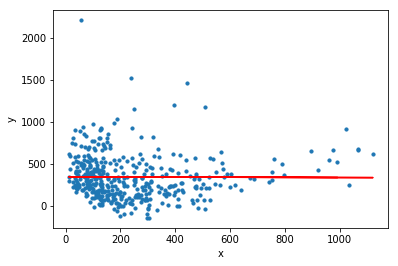

In [9]:
# sckit-learn implementation
# Model initialization
lin_reg = LinearRegression()
# Fit the data(train the model)
lin_reg.fit(x, y)
# Predict
y_pred = lin_reg.predict(x)

# model evaluation
rmse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# printing values
print('Slope:' ,lin_reg.coef_)
print('Intercept:',lin_reg.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

# plotting values

# data points
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')

# predicted values
plt.plot(x, y_pred, color='r')
plt.show()

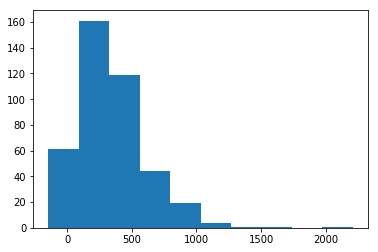

In [10]:
import matplotlib.pyplot as plt

plt.hist(gold['Pred'])
plt.show()

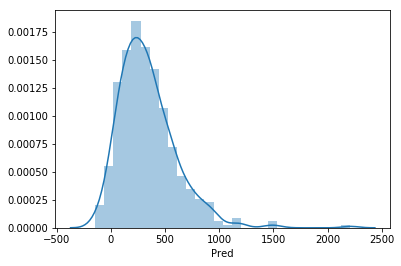

In [11]:
import seaborn as sns
sns.distplot(gold['Pred'])
plt.show()

### 3.2
Import the stock of your choosing AND the Nifty index. Using linear regression (OLS), calculate - The daily Beta value for the past 3 months. (Daily= Daily returns) The monthly Beta value. (Monthly= Monthly returns) Refrain from using the (covariance(x,y)/variance(x)) formula. Attempt the question using regression.(Regression Reference) Were the Beta values more or less than 1 ? What if it was negative ? Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results

In [12]:
Mahin_data = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\M&M.csv')
Mahin_data['Date'] = pd.to_datetime(Mahin_data['Date'])
Mahin_data = Mahin_data.sort_values('Date')
Mahin_data.set_index('Date', inplace=True)
Mahin_data

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,M&amp;M,EQ,1367.85,1373.00,1386.65,1370.00,1374.80,1375.65,1378.31,558190,7.693579e+08,38442,386664,69.27
2017-05-16,M&amp;M,EQ,1375.65,1377.00,1380.50,1363.10,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82
2017-05-17,M&amp;M,EQ,1366.35,1363.00,1384.35,1360.40,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89
2017-05-18,M&amp;M,EQ,1378.80,1369.00,1372.00,1347.50,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70
2017-05-19,M&amp;M,EQ,1352.85,1350.00,1357.60,1328.50,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20
2017-05-22,M&amp;M,EQ,1333.40,1340.15,1341.95,1301.10,1307.00,1306.25,1313.89,436797,5.739011e+08,26521,261661,59.90
2017-05-23,M&amp;M,EQ,1306.25,1315.00,1338.35,1300.00,1328.35,1331.75,1324.90,780182,1.033663e+09,40561,445992,57.17
2017-05-24,M&amp;M,EQ,1331.75,1331.50,1338.80,1301.45,1308.00,1308.65,1314.05,625683,8.221804e+08,29997,382266,61.10
2017-05-25,M&amp;M,EQ,1308.65,1311.00,1335.90,1304.00,1335.90,1327.50,1321.97,1456698,1.925708e+09,60911,1095811,75.23


In [13]:
nifty_data = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Nifty50\Nifty50\Nifty50.csv')
nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
nifty_data = nifty_data.sort_values('Date')
nifty_data.set_index('Date', inplace=True)
nifty_data

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2017-05-15,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
2017-05-16,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2017-05-17,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
2017-05-18,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
2017-05-19,9469.90,9505.75,9390.75,9427.90,259861396,11544.77
2017-05-22,9480.25,9498.65,9427.90,9438.25,202874757,9432.97
2017-05-23,9445.05,9448.05,9370.00,9386.15,231345629,11553.27
2017-05-24,9410.90,9431.90,9341.65,9360.55,218265181,11045.95
2017-05-25,9384.05,9523.30,9379.20,9509.75,298147347,16964.26


In [14]:
fil_Mahin_data = Mahin_data[405:]
fil_nifty_data = nifty_data[405:]

In [15]:
fil_Mahin_data['pct_change'] = fil_Mahin_data['Close Price'].pct_change()
fil_nifty_data['pct_change'] = fil_nifty_data['Close'].pct_change()

C:\Users\sadiq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sadiq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
x = fil_Mahin_data['pct_change'].dropna()
y = fil_nifty_data['pct_change'].dropna()


In [17]:
print(y)

Date
2019-01-02   -0.010779
2019-01-03   -0.011142
2019-01-04    0.005163
2019-01-07    0.004144
2019-01-08    0.002818
2019-01-09    0.004906
2019-01-10   -0.003091
2019-01-11   -0.002463
2019-01-14   -0.005313
2019-01-15    0.013895
2019-01-16    0.000321
2019-01-17    0.001368
2019-01-18    0.000160
2019-01-21    0.005033
2019-01-22   -0.003567
2019-01-23   -0.008354
2019-01-24    0.001690
2019-01-25   -0.006383
2019-01-28   -0.011038
2019-01-29   -0.000877
2019-01-30   -0.000038
2019-01-31    0.016819
2019-02-01    0.005789
2019-02-04    0.001707
2019-02-05    0.002025
2019-02-06    0.011715
2019-02-07    0.000628
2019-02-08   -0.011365
2019-02-11   -0.005007
2019-02-12   -0.005271
                ...   
2019-03-27   -0.003327
2019-03-28    0.010917
2019-03-29    0.004659
2019-04-01    0.003893
2019-04-02    0.003775
2019-04-03   -0.005912
2019-04-04   -0.003946
2019-04-05    0.005859
2019-04-08   -0.005267
2019-04-09    0.005812
2019-04-10   -0.007509
2019-04-11    0.001070
2019-0

In [18]:
import pandas as pd 
import statsmodels.api as sm
myModel = sm.OLS(y.reindex(x.index),x).fit()
myModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pct_change   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     23.45
Date:                Tue, 26 May 2020   Prob (F-statistic):           5.29e-06
Time:                        20:15:26   Log-Likelihood:                 333.63
No. Observations:                  91   AIC:                            -665.3
Df Residuals:                      90   BIC:                            -662.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pct_change     0.2256      0.047      4.843      0.000       0.133       0.318
==============================================================================
Omnibus:                        2.086   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.352   Jarque-Bera (JB):                2.072
Skew:                           0.310   Prob(JB):                        0.355
Kurtosis:                       2.599   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
import pandas as pd
import statsmodels.api as sm

'''
Download monthly prices of Mahindra & Mahindra and NIFTY 50 for Time period: 1-Jan-2014--12-Jan-2017
'''
M_M = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\M&M.csv', parse_dates=True, index_col='Date',)
nifty50 = pd.read_csv(r'C:\Users\sadiq\Downloads\Intership\Nifty50\Nifty50\Nifty50.csv', parse_dates=True, index_col='Date')

# joining the closing prices of the two datasets 
monthly_prices = pd.concat([M_M['Close Price'], nifty50['Close']], axis=1)
monthly_prices.columns = ['M_M', 'NIFTY50']

# check the head of the dataframe
print(monthly_prices.head())

# calculate monthly returns
monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  # drop first missing row
print(clean_monthly_returns.head())

                M_M  NIFTY50
Date                        
2017-05-15  1375.65  9445.40
2017-05-16  1366.35  9512.25
2017-05-17  1378.80  9525.75
2017-05-18  1352.85  9429.45
2017-05-19  1333.40  9427.90
                 M_M   NIFTY50
Date                          
2017-05-16 -0.006760  0.007078
2017-05-17  0.009112  0.001419
2017-05-18 -0.018821 -0.010109
2017-05-19 -0.014377 -0.000164
2017-05-22 -0.020361  0.001098


In [20]:
# split dependent and independent variable
X = clean_monthly_returns['M_M']
y = clean_monthly_returns['NIFTY50']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                NIFTY50   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     40.45
Date:                Tue, 26 May 2020   Prob (F-statistic):           4.60e-10
Time:                        20:15:26   Log-Likelihood:                 1764.4
No. Observations:                 496   AIC:                            -3525.
Df Residuals:                     494   BIC:                            -3516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.406      0.1

C:\Users\sadiq\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
# Daily beta value for the past 3 motnhs for the stock Mahindra is 0.1333 which is less than 1 and hence it is less volatile than the benchmark

In [22]:
# The monthly beta value for the stock Mahindra is 0.01714 which is less than 1 and hence it is less volatile than the benchmark